<a href="https://colab.research.google.com/github/KenichiQaz/ML_Learning/blob/main/Board_game_review_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

In [7]:
print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)

3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]
1.3.5
3.2.2
0.11.2
1.0.2


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#read csv data
games = pandas.read_csv("/content/drive/MyDrive/Colab Notebooks/games.csv")
#print columns of csv and number of entries
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


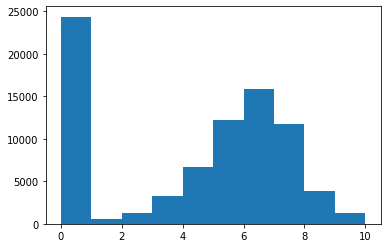

In [11]:
# Make a histogram of average rating column
plt.hist(games["average_rating"])
plt.show()

In [12]:
#print first row of games with 0 average scores
print(games[games["average_rating"] == 0].iloc[0])
print("=======================================")
print(games[games["average_rating"] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                  0.0
minplayers                     0.0
maxplayers                     0.0
playingtime                    0.0
minplaytime                    0.0
maxplaytime                    0.0
minage                         0.0
users_rated                      0
average_rating                 0.0
bayes_average_rating           0.0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                 0.0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                      2005.0
minplayers                            2.0
maxplayers                            2.0
playingtime          

In [13]:
#remove rows with no user reviews
games = games[games["users_rated"] > 0]

#remove rows with missing values
games = games.dropna(axis=0)

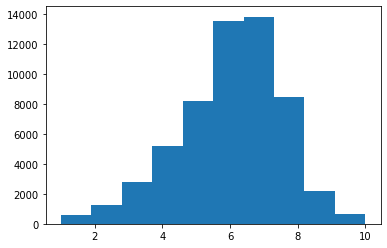

In [14]:
# Make a histogram of average rating column
plt.hist(games["average_rating"])
plt.show()

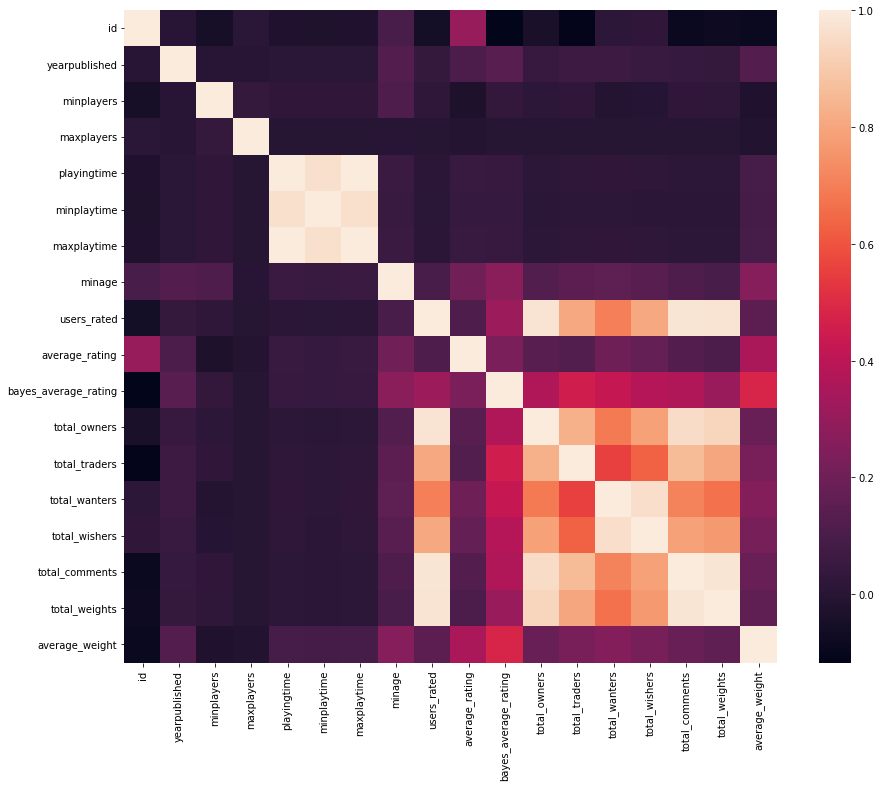

In [15]:
# correlation matrix
corrmat = games.corr()
fig = plt.figure(figsize = (15, 12))
sns.heatmap(corrmat, vmax = 1, square = True)
plt.show()

In [16]:
#Get columns from dataframe
columns = games.columns.tolist()

# remove columns we don't want

columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

target = "average_rating"

In [17]:
# split training and test dataset

train = games.sample(frac=0.8, random_state = 1)
test = games.loc[~games.index.isin(train.index)]

print("Train shape")
print(train.shape)
print("===================================")
print("Test shape")
print(test.shape)

Train shape
(45515, 20)
Test shape
(11379, 20)


In [18]:
# Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#init the model
LR = LinearRegression()

#fit model to data

LR.fit(train[columns], train[target])

LinearRegression()

In [19]:
#Generate the predictions
predictions = LR.predict(test[columns])

# calc error between prediction and actual values

mean_squared_error(predictions,test[target])

2.0788190326293234

In [20]:
# Non-linear model

from sklearn.ensemble import RandomForestRegressor

#init the model 

RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)

#fit model to data
RFR.fit(train[columns], train[target])

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [21]:
# Generate the predictions
predictions = RFR.predict(test[columns])

# calc error between prediction and actual values

mean_squared_error(predictions,test[target])

1.4458625791207198

In [22]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [23]:
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

print("LR rating :  ", rating_LR)
print("LR rating :  ", rating_RFR)

print("Actual rating :  ", test[target].iloc[0])


LR rating :   [8.12061283]
LR rating :   [7.91373581]
Actual rating :   8.07933


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
